In [1]:
# Dependencies
import requests
import json
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np




In [2]:
more_disaster = "Fema_DisasterDeclarationsSummaries.csv"
more_disaster_df = pd.read_csv(more_disaster)

In [3]:
more_disaster_df['declarationDate'] = pd.to_datetime(more_disaster_df['declarationDate']).dt.date
more_disaster_df

,femaDeclarationString,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,...,incidentEndDate,disasterCloseoutDate,fipsStateCode,fipsCountyCode,placeCode,designatedArea,declarationRequestNumber,hash,lastRefresh,id
0,DR-3-LA,3,LA,DR,1953-05-29,1953,Flood,FLOOD,0,1,...,1953-05-29T04:00:00.000Z,NaN,22,0,0,Statewide,53005,745948932fd77a7c6dcd4de7059ff080,2019-07-26T18:49:32.236Z,5d1bceafd5b39c032f2602c1
1,DR-8-IA,8,IA,DR,1953-06-11,1953,Flood,FLOOD,0,1,...,1953-06-11T04:00:00.000Z,NaN,19,0,0,Statewide,53008,e258e9dd25fac73939f59c8ffb5308f5,2019-07-26T18:49:32.162Z,5d1bceafd5b39c032f2602c4
2,DR-11-NH,11,NH,DR,1953-07-02,1953,Fire,FOREST FIRE,0,1,...,1953-07-02T04:00:00.000Z,NaN,33,0,0,Statewide,53011,86a70820dbb80e585cc01e2ce502005c,2019-07-26T18:49:32.163Z,5d1bceafd5b39c032f2602c5
3,DR-9-TX,9,TX,DR,1953-06-19,1953,Flood,FLOOD,0,1,...,1953-06-19T04:00:00.000Z,NaN,48,0,0,Statewide,53010,4485da27a9218458eb2d13a6c33a4c62,2019-07-26T18:49:32.164Z,5d1bceafd5b39c032f2602c6
4,DR-5-MT,5,MT,DR,1953-06-06,1953,Flood,FLOODS,0,1,...,1953-06-06T04:00:00.000Z,NaN,30,0,0,Statewide,53006,59c5483387ca13c6a3c1bc692f4860e1,2019-07-26T18:49:32.235Z,5d1bceafd5b39c032f2602c7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42115,EM-3535-CT,3535,CT,EM,2020-08-07,2020,Hurricane,TROPICAL STORM ISAIAS,0,0,...,2020-08-05T03:59:00.000Z,NaN,9,0,48440,Mohegan Trust Lands,20225,e9f650f122bfd6f6aaec9fdefa5fe947,2020-08-07T04:41:59.273Z,5f2cdb975e5b5d512b5c08f3
42116,EM-3535-CT,3535,CT,EM,2020-08-07,2020,Hurricane,TROPICAL STORM ISAIAS,0,0,...,2020-08-05T03:59:00.000Z,NaN,9,15,99015,Windham (County),20225,6488b4a610cd88695fedbf55787fb7e1,2020-08-07T04:41:59.277Z,5f2cdb975e5b5d512b5c08f4
42117,EM-3535-CT,3535,CT,EM,2020-08-07,2020,Hurricane,TROPICAL STORM ISAIAS,0,0,...,2020-08-05T03:59:00.000Z,NaN,9,0,46000,Mashantucket Pequot Indian Reservation,20225,149a04a7bd2811bb5084dfb8d2bc513e,2020-08-07T04:41:59.279Z,5f2cdb975e5b5d512b5c08f5
42118,EM-3535-CT,3535,CT,EM,2020-08-07,2020,Hurricane,TROPICAL STORM ISAIAS,0,0,...,2020-08-05T03:59:00.000Z,NaN,9,11,99011,"New London (County)(in (P)MSA 3280,5520)",20225,6ae334ae1c5a703f0632edd9291ee619,2020-08-07T04:41:59.281Z,5f2cdb975e5b5d512b5c08f6


In [4]:
current_more_disaster_df = more_disaster_df[more_disaster_df["fyDeclared"]>=1998]
current_more_disaster_df



,femaDeclarationString,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,...,incidentEndDate,disasterCloseoutDate,fipsStateCode,fipsCountyCode,placeCode,designatedArea,declarationRequestNumber,hash,lastRefresh,id
11090,DR-1190-NE,1190,NE,DR,1997-11-01,1998,Severe Storm(s),"SEVERE SNOW STORMS, RAIN, AND STRONG WINDS",0,0,...,1997-10-26T04:00:00.000Z,NaN,31,63,99063,Frontier (County),98001,72995d760fb671714979218ed450e48a,2019-07-26T18:49:43.622Z,5d1bceb9d5b39c032f26383d
11096,DR-1190-NE,1190,NE,DR,1997-11-01,1998,Severe Storm(s),"SEVERE SNOW STORMS, RAIN, AND STRONG WINDS",0,0,...,1997-10-26T04:00:00.000Z,NaN,31,79,99079,Hall (County),98001,ac5d4d930024447277bfb9953f754eb3,2019-07-26T18:49:43.626Z,5d1bceb9d5b39c032f263843
11144,DR-1190-NE,1190,NE,DR,1997-11-01,1998,Severe Storm(s),"SEVERE SNOW STORMS, RAIN, AND STRONG WINDS",0,0,...,1997-10-26T04:00:00.000Z,NaN,31,153,99153,Sarpy (County),98001,f3694bd0ae32f2e9d70621dc606203fa,2019-07-26T18:49:43.676Z,5d1bceb9d5b39c032f263873
11145,DR-1190-NE,1190,NE,DR,1997-11-01,1998,Severe Storm(s),"SEVERE SNOW STORMS, RAIN, AND STRONG WINDS",0,0,...,1997-10-26T04:00:00.000Z,NaN,31,185,99185,York (County),98001,98d4e4d7cd926c967fc748d6130e9faf,2019-07-26T18:49:43.677Z,5d1bceb9d5b39c032f263877
11146,DR-1190-NE,1190,NE,DR,1997-11-01,1998,Severe Storm(s),"SEVERE SNOW STORMS, RAIN, AND STRONG WINDS",0,0,...,1997-10-26T04:00:00.000Z,NaN,31,131,99131,Otoe (County),98001,04106104304928e1142bf07303ce59f3,2019-07-26T18:49:43.627Z,5d1bceb9d5b39c032f263878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42115,EM-3535-CT,3535,CT,EM,2020-08-07,2020,Hurricane,TROPICAL STORM ISAIAS,0,0,...,2020-08-05T03:59:00.000Z,NaN,9,0,48440,Mohegan Trust Lands,20225,e9f650f122bfd6f6aaec9fdefa5fe947,2020-08-07T04:41:59.273Z,5f2cdb975e5b5d512b5c08f3
42116,EM-3535-CT,3535,CT,EM,2020-08-07,2020,Hurricane,TROPICAL STORM ISAIAS,0,0,...,2020-08-05T03:59:00.000Z,NaN,9,15,99015,Windham (County),20225,6488b4a610cd88695fedbf55787fb7e1,2020-08-07T04:41:59.277Z,5f2cdb975e5b5d512b5c08f4
42117,EM-3535-CT,3535,CT,EM,2020-08-07,2020,Hurricane,TROPICAL STORM ISAIAS,0,0,...,2020-08-05T03:59:00.000Z,NaN,9,0,46000,Mashantucket Pequot Indian Reservation,20225,149a04a7bd2811bb5084dfb8d2bc513e,2020-08-07T04:41:59.279Z,5f2cdb975e5b5d512b5c08f5
42118,EM-3535-CT,3535,CT,EM,2020-08-07,2020,Hurricane,TROPICAL STORM ISAIAS,0,0,...,2020-08-05T03:59:00.000Z,NaN,9,11,99011,"New London (County)(in (P)MSA 3280,5520)",20225,6ae334ae1c5a703f0632edd9291ee619,2020-08-07T04:41:59.281Z,5f2cdb975e5b5d512b5c08f6


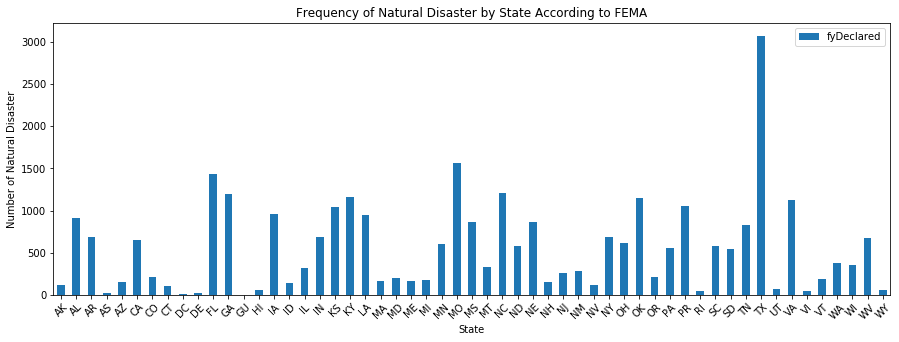

In [5]:
#Make Bar Graph for instances per state.
States = current_more_disaster_df[["state", "fyDeclared"]]
State_count = States.groupby("state").count()
State_count
State_count.plot(kind="bar", figsize=(15,5), rot = 45)
plt.xlabel("State")
plt.ylabel("Number of Natural Disaster" )
plt.title("Frequency of Natural Disaster by State According to FEMA")
plt.savefig("Bar Graph Frequency of Natural Disasters")

In [6]:
Sorted_State_count = State_count.sort_values(by ="fyDeclared", ascending = False)
Sorted_State_count

,fyDeclared
state,
TX,3070
MO,1564
FL,1431
NC,1213
GA,1202
KY,1160
OK,1153
VA,1129
PR,1059


In [7]:
#1998 - 2020
FEMA_Assistance = "cleaned_Fema_PublicAssistanceFundedProjectsDetails.csv"
FEMA_Funding_df = pd.read_csv(FEMA_Assistance)
FEMA_Funding_df.head()

,Year,Month,damageCategory,county,countyCode,state,stateCode,stateNumberCode,projectAmount,federalShareObligated,totalObligated
0,1998,8,Roads and Bridges,Uvalde,463.0,Texas,TX,48,1489.98,1117.49,1158.77
1,1998,8,Roads and Bridges,Uvalde,463.0,Texas,TX,48,11300.00,8475.00,8788.01
2,1998,8,Roads and Bridges,Uvalde,463.0,Texas,TX,48,3486.00,2614.50,2711.06
3,1998,8,Roads and Bridges,Uvalde,463.0,Texas,TX,48,3819.67,2864.75,2970.56
4,1998,8,Public Utilities,Val Verde,465.0,Texas,TX,48,423791.13,317843.35,333171.72


In [8]:
fps_df = FEMA_Funding_df.groupby(["stateCode"]).sum()["projectAmount"]
FPS_df = pd.DataFrame(fps_df)
FPS_df.head()

,projectAmount
stateCode,
AK,3.721684e+08
AL,9.787197e+08
AR,9.715827e+08
AS,1.356562e+08
AZ,1.546793e+08


In [9]:
Sorted_FPS_df = FPS_df.sort_values(by = "projectAmount", ascending = False)
Sorted_FPS_df


,projectAmount
stateCode,
NY,2.397291e+10
LA,1.741081e+10
FL,1.014475e+10
TX,8.402377e+09
PR,8.288632e+09
CA,6.279871e+09
MS,3.716484e+09
NJ,3.219935e+09
VI,2.434902e+09


In [ ]:
#Used to gather the date in the organizational method that I want.
# practice_df = pd.read_excel("cleaned_Fema_PublicAssistanceFundedProjectsDetails.xlsx")
# table = pd.pivot_table(practice_df,index=["stateCode","Year"],
#                 values=["projectAmount"],
#                 aggfunc=[np.sum],fill_value=0)



In [ ]:
#Save to csv file to be cleaned up in excel
# table.to_csv(r"Pandas_Pivot_Table.csv")

In [10]:
#read in cleaned pivot table to be used in the rest of the notebook
graphing_df = pd.read_csv("Cleaned_ProjectAmounts_Pivot_Table.csv")
Graphing_df = pd.DataFrame(graphing_df)
Graphing_df


,StateCode,Year,projectamount
0,AK,2000,13925389.53
1,AK,2002,39451889.31
2,AK,2003,2437625.49
3,AK,2004,16113647.16
4,AK,2005,4989274.58
...,...,...,...
743,WY,2010,3995482.25
744,WY,2011,7404860.46
745,WY,2015,3324047.50
746,WY,2017,12194564.58


In [11]:
StateCode = Graphing_df["StateCode"]
StateCode
Year = Graphing_df["Year"]
Amount = Graphing_df["projectamount"]

In [12]:
Amount_list = Amount.values.tolist()
Amount_list

Better_Amount_List = []
for a in Amount_list:
    inmillions = a/1000000
    Better_Amount_List.append(inmillions)
Better_Amount_List

[13.925389529999999,
 39.451889310000006,
 2.4376254900000003,
 16.11364716,
 4.98927458,
 29.074288890000002,
 16.07375096,
 31.18679123,
 8.90749509,
 35.68829442,
 41.04887414,
 45.20280028,
 5.35101941,
 15.14803203,
 11.47657099,
 5.45302136,
 45.98240168,
 4.65720266,
 7.3316741500000004,
 5.7095727599999995,
 9.11901514,
 19.86262739,
 16.18347718,
 240.7952622,
 139.61686669999997,
 13.51355033,
 19.01064569,
 69.12751995,
 9.74897309,
 228.5016521,
 8.784097189999999,
 44.777553579999996,
 49.46819799,
 9.14384108,
 74.63208743000001,
 12.03839324,
 1.3546565400000001,
 9.19020451,
 206.3017827,
 3.8520909700000003,
 2.8292044900000004,
 19.16483989,
 13.28949557,
 44.511214630000005,
 2.91977672,
 71.53965993999999,
 333.0864925,
 12.400274710000001,
 70.28310558,
 32.982797829999996,
 20.36934195,
 16.04838089,
 18.539233059999997,
 37.05365588,
 57.22116238,
 7.2229725700000005,
 1.59004222,
 6.92709877,
 26.10218978,
 14.27947659,
 18.34617345,
 2.13201896,
 7.7417368,
 1.

In [13]:
Better_graphing_df = pd.DataFrame({
    "State":StateCode,
    "Year" : Year,
    "Amount" :Better_Amount_List
})
Better_graphing_df

,State,Year,Amount
0,AK,2000,13.925390
1,AK,2002,39.451889
2,AK,2003,2.437625
3,AK,2004,16.113647
4,AK,2005,4.989275
...,...,...,...
743,WY,2010,3.995482
744,WY,2011,7.404860
745,WY,2015,3.324047
746,WY,2017,12.194565


In [14]:
Sum_Graphing_df = Better_graphing_df.groupby("State").sum()["Amount"]
Sum_Graphing_df_Sorted = Sum_Graphing_df.sort_values(ascending = False)
Sum_Graphing_df_Sorted_Final = pd.DataFrame(Sum_Graphing_df_Sorted)

Sum_Graphing_df_Sorted_Final = Sum_Graphing_df_Sorted_Final.iloc[:20]
Sum_Graphing_df_Sorted_Final

,Amount
State,
NY,23972.911904
LA,17410.807781
FL,10144.746792
TX,8402.377195
CA,6279.870804
MS,3716.484389
NJ,3219.934670
NC,2413.573803
IA,2231.029383


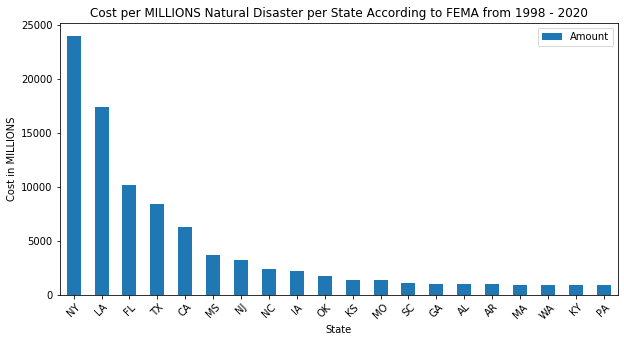

In [15]:
Sum_Graphing_df_Sorted_Final.plot(kind="bar", figsize=(10,5), rot = 45)
plt.xlabel("State")
plt.ylabel("Cost in MILLIONS" )
plt.title("Cost per MILLIONS Natural Disaster per State According to FEMA from 1998 - 2020")
plt.savefig("Bar Graph State and Cost")

In [16]:
Graphing_df.dtypes

StateCode         object
Year               int64
projectamount    float64
dtype: object

In [17]:
#numpy.int and numpy.float are cuasing issues in graphing.  Must convert type.
type(Graphing_df["Year"][113])
type(Graphing_df["projectamount"][113])

numpy.float64

In [18]:
#Still numpy types
New_Graphing_df = Graphing_df.convert_dtypes()

New_Graphing_df.dtypes

StateCode         string
Year               Int64
projectamount    float64
dtype: object

In [19]:
Florida_df = New_Graphing_df[New_Graphing_df["StateCode"]=="FL"]
Florida_df
Sorted_Florida = Florida_df.sort_values(by = "projectamount")

In [20]:
Better_Year_Florida = []
for y in Sorted_Florida["Year"]:
    Better_Year_Florida.append(y.item())
type(Better_Year_Florida[0])

Better_Amount_Florida = []
for a in Sorted_Florida["projectamount"]:
    inmillions = a/1000000
    Better_Amount_Florida.append(inmillions)
type(Better_Amount_Florida[0])
Better_Amount_Florida


[8.61372334,
 13.7807706,
 15.20880309,
 47.89444055,
 48.956145119999995,
 54.70208579,
 86.81134886,
 143.7449296,
 170.3317355,
 190.20661969999998,
 395.9866148,
 403.88723289999996,
 567.0797008,
 1211.272106,
 1860.968141,
 2199.030943,
 2726.271451]

In [21]:
#Create a data frame for graphing Florida
Graphing_FL_df = pd.DataFrame({
    
    "Year" : Better_Year_Florida,
    "ProjectAmount" : Better_Amount_Florida
})
Graphing_FL_df


,Year,ProjectAmount
0,2019,8.613723
1,2007,13.780771
2,2003,15.208803
3,2009,47.894441
4,2001,48.956145
5,2013,54.702086
6,2012,86.811349
7,2008,143.744930
8,2014,170.331736
9,1999,190.206620


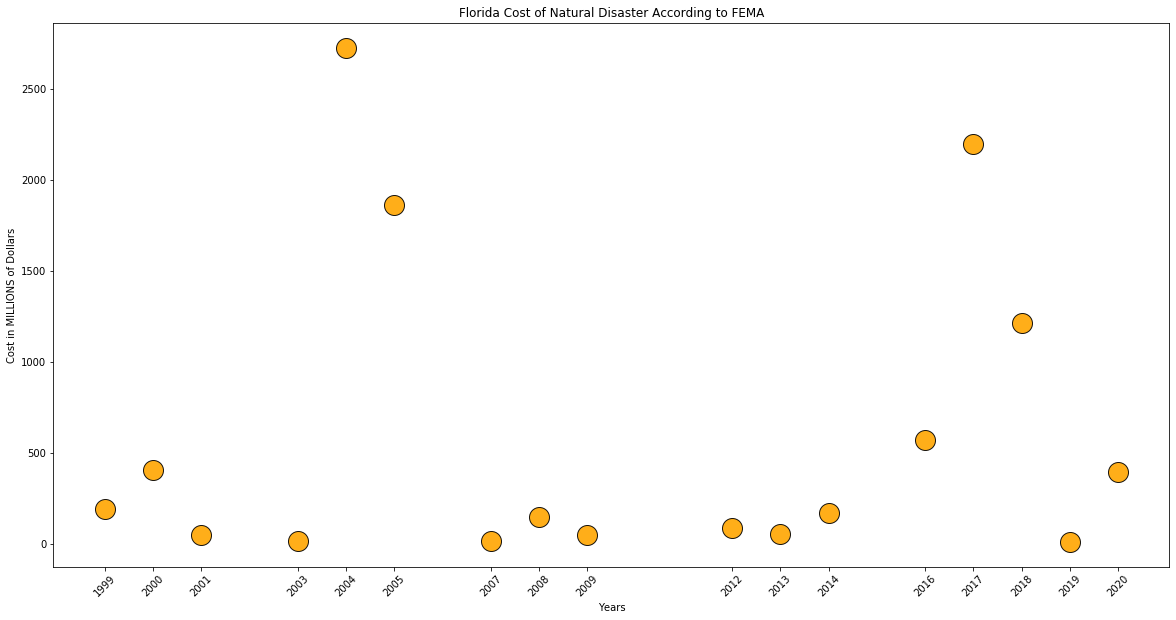

In [22]:
#Create Scatter Plot with the formatted Florida csv file converted to a dataframe.
x_axis = Graphing_FL_df["Year"]
y_axis = Graphing_FL_df["ProjectAmount"]
len(x_axis)
len(y_axis)
plt.figure(figsize=(20, 10))
plt.scatter(x_axis, y_axis, marker="o", facecolors="orange", edgecolors="black",s=400, alpha=0.9)
plt.xticks(x_axis,  rotation ='45') 
plt.ylabel("Cost in MILLIONS of Dollars")
plt.xlabel("Years")
plt.title("Florida Cost of Natural Disaster According to FEMA")
plt.savefig("Florida")

In [23]:
Texas_df = New_Graphing_df[New_Graphing_df["StateCode"]=="TX"]
Texas_df
Sorted_Texas = Texas_df.sort_values(by = "projectamount")

In [24]:
Better_Year_Texas = []
for y in Sorted_Texas ["Year"]:
    Better_Year_Texas.append(y.item())
type(Better_Year_Texas[0])

Better_Amount_Texas = []
for a in Sorted_Texas ["projectamount"]:
    inmillions = a/1000000
    Better_Amount_Texas.append(inmillions)
type(Better_Amount_Texas[0])
Better_Amount_Texas

[4.844006599999999,
 14.79988957,
 26.09495806,
 29.04650722,
 36.06091342,
 53.58300369,
 53.86931462,
 54.3225101,
 69.91360227,
 104.1905702,
 134.4204296,
 206.6274679,
 272.6049205,
 614.6716339,
 881.828327,
 926.6083378,
 2456.182818,
 2462.707985]

In [25]:
#Create a data frame for graphing Texas
Graphing_TX_df = pd.DataFrame({
    
    "Year" : Better_Year_Texas,
    "ProjectAmount" : Better_Amount_Texas
})
Graphing_TX_df


,Year,ProjectAmount
0,2000,4.844007
1,1999,14.799890
2,2010,26.094958
3,2003,29.046507
4,2002,36.060913
5,1998,53.583004
6,2006,53.869315
7,2013,54.322510
8,2019,69.913602
9,2007,104.190570


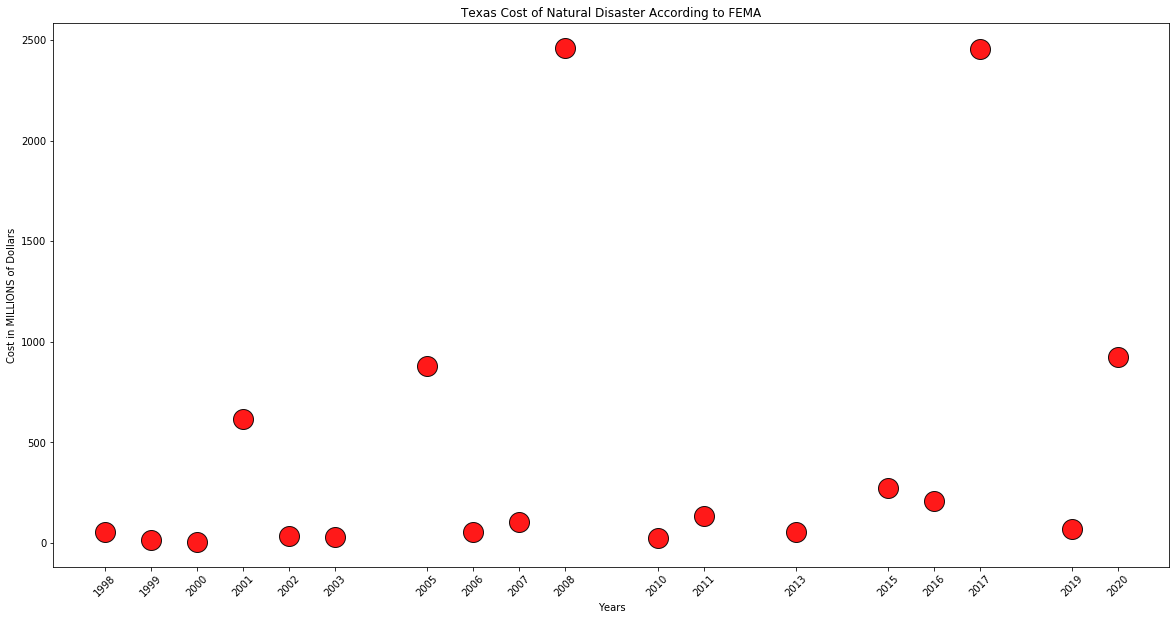

In [26]:
#Create Scatter Plot with the formatted Texas csv file converted to a dataframe.
x_axis = Graphing_TX_df["Year"]
y_axis = Graphing_TX_df["ProjectAmount"]
len(x_axis)
len(y_axis)
plt.figure(figsize=(20, 10))
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",s=400, alpha=0.9)
plt.xticks(x_axis,  rotation ='45') 
plt.ylabel("Cost in MILLIONS of Dollars")
plt.xlabel("Years")
plt.title("Texas Cost of Natural Disaster According to FEMA")
plt.savefig("Texas")

In [27]:
Missouri_df = New_Graphing_df[New_Graphing_df["StateCode"]=="MO"]
Missouri_df
Sorted_Missouri = Missouri_df.sort_values(by = "projectamount")

In [28]:
Better_Year_Missouri = []
for y in Sorted_Missouri["Year"]:
    Better_Year_Missouri.append(y.item())
type(Better_Year_Missouri[0])

Better_Amount_Missouri = []
for a in Sorted_Missouri["projectamount"]:
    inmillions = a/1000000
    Better_Amount_Missouri.append(inmillions)
type(Better_Amount_Missouri[0])
Better_Amount_Missouri

[1.75164133,
 3.25854956,
 7.47722837,
 20.188537059999998,
 23.3845923,
 25.273328170000003,
 35.424607990000005,
 44.878609020000006,
 52.001046280000004,
 66.49052404999999,
 67.50208624,
 96.85560735,
 102.607475,
 109.9261197,
 189.089596,
 217.1482904,
 272.3659899]

In [29]:
#Create a data frame for graphing Missouri
Graphing_MO_df = pd.DataFrame({
    
    "Year" : Better_Year_Missouri,
    "ProjectAmount" : Better_Amount_Missouri
})
Graphing_MO_df


,Year,ProjectAmount
0,2005,1.751641
1,2000,3.258550
2,2014,7.477228
3,2020,20.188537
4,2010,23.384592
5,2003,25.273328
6,2013,35.424608
7,2016,44.878609
8,2006,52.001046
9,2019,66.490524


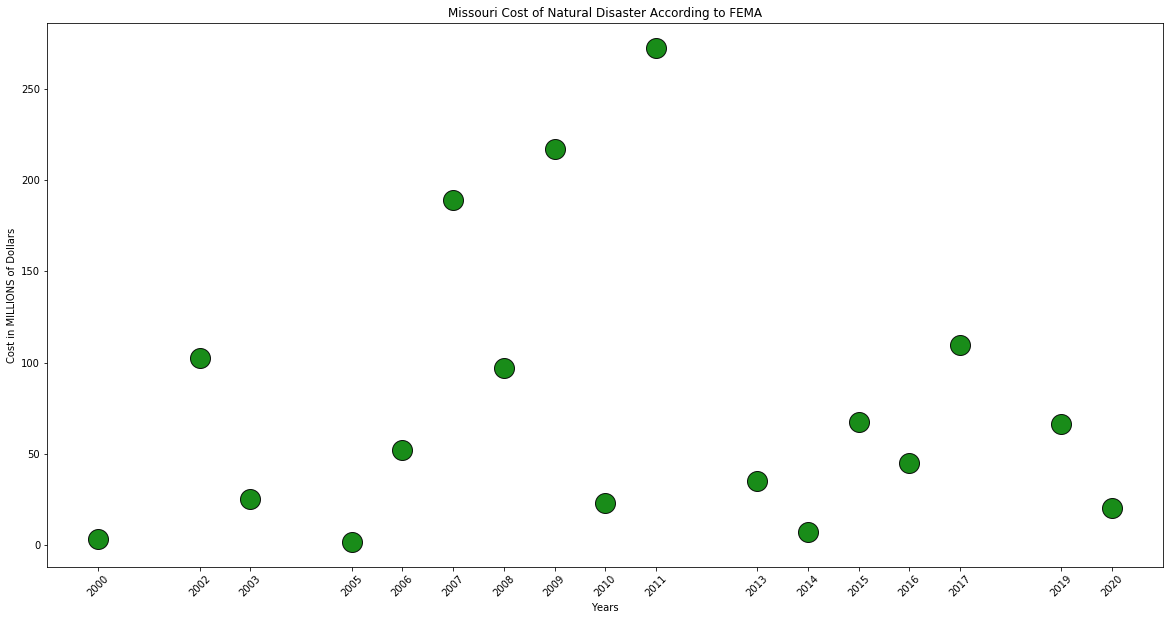

In [30]:
#Create Scatter Plot with the formatted Missouri csv file converted to a dataframe.
x_axis = Graphing_MO_df["Year"]
y_axis = Graphing_MO_df["ProjectAmount"]
len(x_axis)
len(y_axis)
plt.figure(figsize=(20, 10))
plt.scatter(x_axis, y_axis, marker="o", facecolors="green", edgecolors="black",s=400, alpha=0.9)
plt.xticks(x_axis,  rotation ='45') 
plt.ylabel("Cost in MILLIONS of Dollars")
plt.xlabel("Years")
plt.title("Missouri Cost of Natural Disaster According to FEMA")
plt.savefig("Missouri")

In [31]:
Georgia_df = New_Graphing_df[New_Graphing_df["StateCode"]=="GA"]
Georgia_df
Sorted_Georgia = Georgia_df.sort_values(by = "projectamount")

In [32]:
Better_Year_Georgia = []
for y in Sorted_Georgia["Year"]:
    Better_Year_Georgia.append(y.item())
type(Better_Year_Georgia[0])
Better_Year_Georgia
Better_Amount_Georgia = []
for a in Sorted_Georgia["projectamount"]:
    inmillions = a/1000000
    Better_Amount_Georgia.append(inmillions)
type(Better_Amount_Georgia[0])
Better_Amount_Georgia

[7.07958932,
 9.199292,
 14.00803148,
 18.9153981,
 26.85806626,
 34.4888785,
 50.507574240000004,
 59.005182409999996,
 66.74377093,
 75.19114395,
 132.2612527,
 147.492874,
 151.86836169999998,
 206.8684541]

In [33]:
#Create a data frame for graphing Georgia
Graphing_GA_df = pd.DataFrame({
    
    "Year" : Better_Year_Georgia,
    "ProjectAmount" : Better_Amount_Georgia
})
Graphing_GA_df


,Year,ProjectAmount
0,1999,7.079589
1,2005,9.199292
2,2015,14.008031
3,2008,18.915398
4,2011,26.858066
5,2004,34.488878
6,2000,50.507574
7,2014,59.005182
8,2007,66.743771
9,2020,75.191144


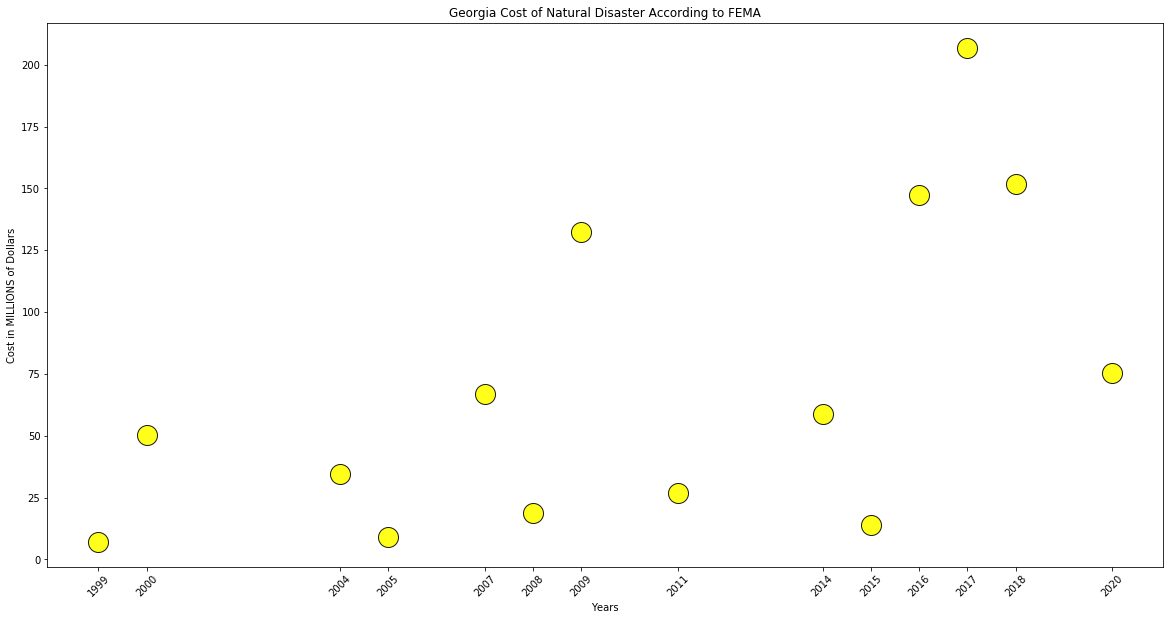

In [34]:
#Create Scatter Plot with the formatted Georgia csv file converted to a dataframe.
x_axis = Graphing_GA_df["Year"]
y_axis = Graphing_GA_df["ProjectAmount"]
len(x_axis)
len(y_axis)
plt.figure(figsize=(20, 10))
plt.scatter(x_axis, y_axis, marker="o", facecolors="yellow", edgecolors="black",s=400, alpha=0.9)
plt.xticks(x_axis,  rotation ='45') 
plt.ylabel("Cost in MILLIONS of Dollars")
plt.xlabel("Years")
plt.title("Georgia Cost of Natural Disaster According to FEMA")
plt.savefig("Georgia")

In [35]:
NorthCarolina_df = New_Graphing_df[New_Graphing_df["StateCode"]=="NC"]
NorthCarolina_df
Sorted_NorthCarolina = NorthCarolina_df.sort_values(by = "projectamount")


In [36]:
Better_Year_NorthCarolina = []
for y in Sorted_NorthCarolina["Year"]:
    Better_Year_NorthCarolina.append(y.item())
type(Better_Year_NorthCarolina[0])
Better_Year_NorthCarolina
Better_Amount_NorthCarolina = []
for a in Sorted_NorthCarolina["projectamount"]:
    inmillions = a/1000000
    Better_Amount_NorthCarolina.append(inmillions)
type(Better_Amount_NorthCarolina[0])
Better_Amount_NorthCarolina


[6.1600325400000004,
 25.649675600000002,
 28.19521809,
 30.92935323,
 35.51115811,
 48.51457989,
 58.81473115,
 65.21228219,
 111.9599285,
 112.88195040000001,
 142.789654,
 224.6466698,
 329.6711104,
 381.0740035,
 811.5634554]

In [37]:
#Create a data frame for graphing NorthCarolina
Graphing_NC_df = pd.DataFrame({
    
    "Year" : Better_Year_NorthCarolina,
    "ProjectAmount" : Better_Amount_NorthCarolina
})
Graphing_NC_df

,Year,ProjectAmount
0,2008,6.160033
1,2010,25.649676
2,2013,28.195218
3,2005,30.929353
4,2000,35.511158
5,2014,48.514580
6,2019,58.814731
7,2004,65.212282
8,2003,111.959929
9,2002,112.881950


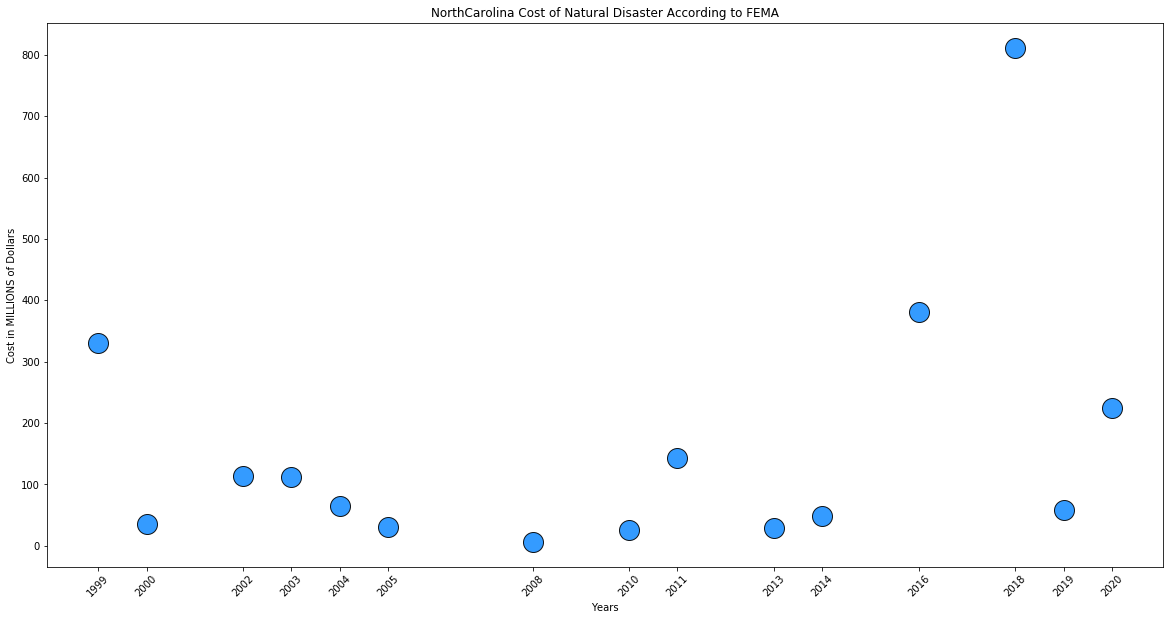

In [38]:
#Create Scatter Plot with the formatted North Carolina csv file converted to a dataframe.
x_axis = Graphing_NC_df["Year"]
y_axis = Graphing_NC_df["ProjectAmount"]
len(x_axis)
len(y_axis)
plt.figure(figsize=(20, 10))
plt.scatter(x_axis, y_axis, marker="o", facecolors="dodgerblue", edgecolors="black",s=400, alpha=0.9)
plt.xticks(x_axis,  rotation ='45') 
plt.ylabel("Cost in MILLIONS of Dollars")
plt.xlabel("Years")
plt.title("NorthCarolina Cost of Natural Disaster According to FEMA")
plt.savefig("North_Carolina")

In [39]:
Kentucky_df = New_Graphing_df[New_Graphing_df["StateCode"]=="KY"]
Kentucky_df
Sorted_Kentucky = Kentucky_df.sort_values(by = "projectamount")

In [40]:
Better_Year_Kentucky = []
for y in Sorted_Kentucky["Year"]:
    Better_Year_Kentucky.append(y.item())
type(Better_Year_Kentucky[0])
Better_Year_Kentucky
Better_Amount_Kentucky = []
for a in Sorted_Kentucky["projectamount"]:
    inmillions = a/1000000
    Better_Amount_Kentucky.append(inmillions)
type(Better_Amount_Kentucky[0])
Better_Amount_Kentucky


[2.24393523,
 4.26792956,
 5.439890269999999,
 6.30393516,
 7.53832922,
 9.60689114,
 15.10664761,
 19.397177929999998,
 24.66148411,
 26.99181278,
 33.39815634,
 35.86336447,
 44.63585182,
 64.01197485,
 65.08790722,
 74.76701325,
 98.12914722,
 377.0329834]

In [41]:
#Create a data frame for graphing NorthCarolina
Graphing_KY_df = pd.DataFrame({
    
    "Year" : Better_Year_Kentucky,
    "ProjectAmount" : Better_Amount_Kentucky
})
Graphing_KY_df

,Year,ProjectAmount
0,2020,2.243935
1,2007,4.267930
2,2005,5.439890
3,2016,6.303935
4,2014,7.538329
5,2000,9.606891
6,2001,15.106648
7,2012,19.397178
8,2002,24.661484
9,2004,26.991813


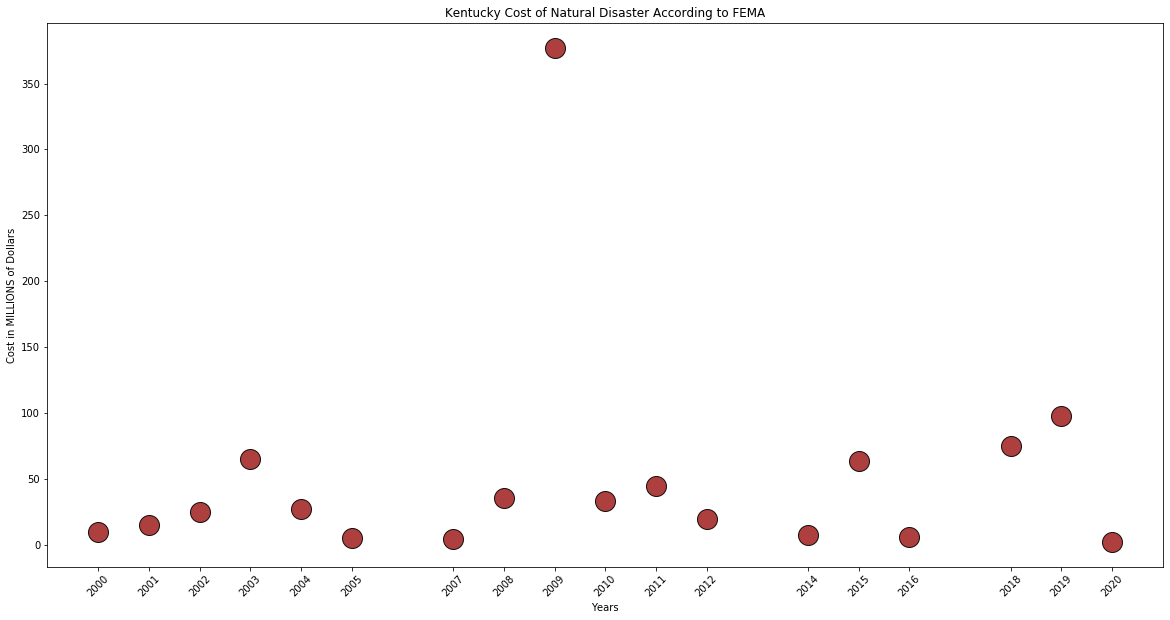

In [42]:
#Create Scatter Plot with the formatted North Carolina csv file converted to a dataframe.
x_axis = Graphing_KY_df["Year"]
y_axis = Graphing_KY_df["ProjectAmount"]
len(x_axis)
len(y_axis)
plt.figure(figsize=(20, 10))
plt.scatter(x_axis, y_axis, marker="o", facecolors="brown", edgecolors="black",s=400, alpha=0.9)
plt.xticks(x_axis,  rotation ='45') 
plt.ylabel("Cost in MILLIONS of Dollars")
plt.xlabel("Years")
plt.title("Kentucky Cost of Natural Disaster According to FEMA")
plt.savefig("Kentucky")

In [43]:
Oklahoma_df = New_Graphing_df[New_Graphing_df["StateCode"]=="OK"]
Oklahoma_df
Sorted_Oklahoma = Oklahoma_df.sort_values(by = "projectamount")

In [44]:
Better_Year_Oklahoma = []
for y in Sorted_Oklahoma["Year"]:
    Better_Year_Oklahoma.append(y.item())
type(Better_Year_Oklahoma[0])
Better_Year_Oklahoma
Better_Amount_Oklahoma = []
for a in Sorted_Oklahoma["projectamount"]:
    inmillions = a/1000000
    Better_Amount_Oklahoma.append(inmillions)
type(Better_Amount_Oklahoma[0])
Better_Amount_Oklahoma

[0.15935216,
 3.62679016,
 3.86188436,
 5.164184400000001,
 6.96463551,
 11.234233119999999,
 12.46312357,
 12.77427019,
 13.711940740000001,
 25.869829690000003,
 43.66577172,
 52.88191152,
 55.202463939999994,
 71.25930245,
 123.7613026,
 142.7779151,
 147.5288037,
 193.865116,
 201.38411480000002,
 280.1231413,
 301.5254438]

In [45]:
#Create a data frame for graphing NorthCarolina
Graphing_OK_df = pd.DataFrame({
    
    "Year" : Better_Year_Oklahoma,
    "ProjectAmount" : Better_Amount_Oklahoma
})
Graphing_OK_df

,Year,ProjectAmount
0,2020,0.159352
1,2000,3.626790
2,2012,3.861884
3,2014,5.164184
4,2018,6.964636
5,2003,11.234233
6,2005,12.463124
7,2006,12.774270
8,2009,13.711941
9,2011,25.869830


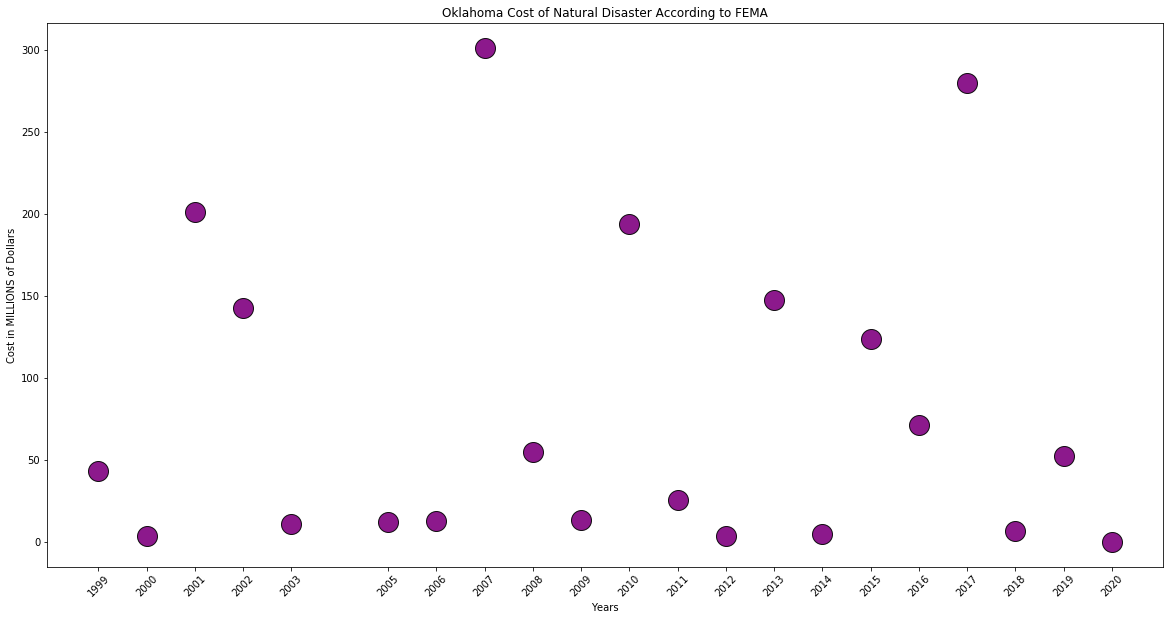

In [46]:
#Create Scatter Plot with the formatted North Carolina csv file converted to a dataframe.
x_axis = Graphing_OK_df["Year"]
y_axis = Graphing_OK_df["ProjectAmount"]
len(x_axis)
len(y_axis)
plt.figure(figsize=(20, 10))
plt.scatter(x_axis, y_axis, marker="o", facecolors="purple", edgecolors="black",s=400, alpha=0.9)
plt.xticks(x_axis,  rotation ='45') 
plt.ylabel("Cost in MILLIONS of Dollars")
plt.xlabel("Years")
plt.title("Oklahoma Cost of Natural Disaster According to FEMA")
plt.savefig("Oklahoma")